In [112]:
import matplotlib.pyplot as plt
import numpy as np

# uma dezena
alpha = 1
beta = 1
gamma = 1
# algumas dezenas
Ca = 1
Cb = 0
Cc = 1
# algumas unidades
Tmax = 1.5
T = 0
deltaT = 0.5

def derivada_Ca(Ca, Cb, Cc, alpha): 
    return (-alpha*Ca*Cc + Cb) 

def derivada_Cb(Ca, Cb, Cc, beta): 
    return (beta*Ca*Cc - Cb) 

def derivada_Cc(Ca, Cb, Cc, gamma): 
    return (-gamma*Ca*Cc + Cb - 2*Cc) 

def rungeKutta(T, deltaT, Ca, Cb, Cc, alpha, beta, gamma): 
    # k [Ca,Cb,Cc]
    k1 = [0, 0, 0]
    k2 = [0, 0, 0]
    k3 = [0, 0, 0]
    y = [Ca, Cb, Cc]
    vetor_Ca = [Ca]
    vetor_Cb = [Cb]
    vetor_Cc = [Cc]
    vetor_T = [T]

    while(T<Tmax):

        # print("\nITERACAO DO TEMPO {} + PASSO DE TEMPO {}".format(T, deltaT))

        k1[0] = derivada_Ca(Ca, Cb, Cc, alpha)
        k1[1] = derivada_Cb(Ca, Cb, Cc, beta)
        k1[2] = derivada_Cc(Ca, Cb, Cc, gamma)
        # print("k1_Ca = {}\nk1_Cb = {}\nk1_Cc = {}".format(k1[0], k1[1], k1[2]))

        k2[0] = derivada_Ca(Ca+k1[0]*(deltaT/2), Cb+k1[1]*(deltaT/2), Cc+k1[2]*(deltaT/2), alpha)
        k2[1] = derivada_Cb(Ca+k1[0]*(deltaT/2), Cb+k1[1]*(deltaT/2), Cc+k1[2]*(deltaT/2), beta)
        k2[2] = derivada_Cc(Ca+k1[0]*(deltaT/2), Cb+k1[1]*(deltaT/2), Cc+k1[2]*(deltaT/2), gamma)
        # print("\nk2_Ca = {}\nk2_Cb = {}\nk2_Cc = {}".format(k2[0], k2[1], k2[2]))


        k3[0] = derivada_Ca(Ca-(k1[0]*deltaT)+(2*k2[0]*deltaT), Cb-(k1[1]*deltaT)+(2*k2[1]*deltaT), Cc-(k1[2]*deltaT)+(2*k2[2]*deltaT), alpha)
        k3[1] = derivada_Cb(Ca-(k1[0]*deltaT)+(2*k2[0]*deltaT), Cb-(k1[1]*deltaT)+(2*k2[1]*deltaT), Cc-(k1[2]*deltaT)+(2*k2[2]*deltaT), beta)
        k3[2] = derivada_Cc(Ca-(k1[0]*deltaT)+(2*k2[0]*deltaT), Cb-(k1[1]*deltaT)+(2*k2[1]*deltaT), Cc-(k1[2]*deltaT)+(2*k2[2]*deltaT), gamma)
        # print("\nk3_Ca = {}\nk3_Cb = {}\nk3_Cc = {}".format(k3[0], k3[1], k3[2]))


        y[0] = y[0] + (1/6)*(k1[0]+4*k2[0]+k3[0])*deltaT
        y[1] = y[1] + (1/6)*(k1[1]+4*k2[1]+k3[1])*deltaT
        y[2] = y[2] + (1/6)*(k1[2]+4*k2[2]+k3[2])*deltaT
        # print("\nCa = {}\nCb = {}\nCc = {}".format(y[0], y[1], y[2]))

        Ca = y[0]
        Cb = y[1]
        Cc = y[2]

        vetor_Ca.append(Ca)
        vetor_Cb.append(Cb)
        vetor_Cc.append(Cc)
        T = T+deltaT
        vetor_T.append(T)
        
    return Ca, Cb, Cc, vetor_Ca, vetor_Cb, vetor_Cc, vetor_T


resultados_RK = rungeKutta(T, deltaT, Ca, Cb, Cc, alpha, beta, gamma)

print("\nRESULTADO FINAL DAS ITERACOES\nDEPOIS DOS TEMPOS {} COM PASSO DE TEMPO DE {}".format(resultados_RK[6], deltaT))

print("\nCa = {}\nCb = {}\nCc = {}".format(resultados_RK[0], resultados_RK[1], resultados_RK[2]))




RESULTADO FINAL DAS ITERACOES
DEPOIS DOS TEMPOS [0, 0.5, 1.0, 1.5] COM PASSO DE TEMPO DE 0.5

Ca = 0.8366154310906012
Cb = 0.16338456890939876
Cc = 0.0756512786071251


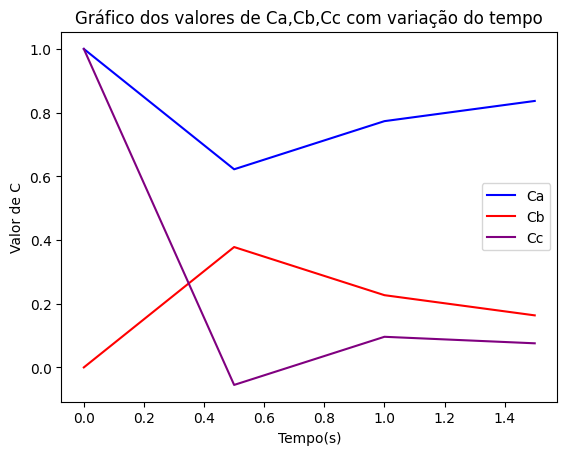

In [113]:
def grafico_RK(resultados_RK):

    plt.title('Gráfico dos valores de Ca,Cb,Cc com variação do tempo')
    plt.plot(resultados_RK[6], resultados_RK[3], color='blue', label='Ca')
    plt.plot(resultados_RK[6], resultados_RK[4], color='red',label='Cb')
    plt.plot(resultados_RK[6], resultados_RK[5], color='purple',label='Cc')
    plt.legend()
    plt.xlabel("Tempo(s)")
    plt.ylabel("Valor de C")
    plt.show()

grafico_RK(resultados_RK)

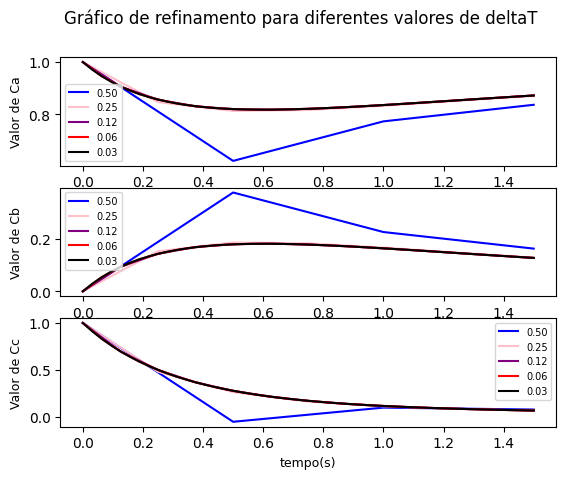

In [114]:
def refinamento():
    i = 0
    # vetor_deltaT = [0.1, 0.2, 0.3, 0.4, 0.5]
    vetor_deltaT = [deltaT]

    for i in range (0,4):
        vetor_deltaT.append(vetor_deltaT[i]/2)

    ######## AREA GRAFICO ##########
    fig, (grafico_Ca, grafico_Cb, grafico_Cc) = plt.subplots(3, 1)

    for i in range (0,5):
        resultados_RK = rungeKutta(T, vetor_deltaT[i], Ca, Cb, Cc, alpha, beta, gamma)
        cor = ['blue', 'pink', 'purple', 'red', 'black']
        # print("\nResultado {} de RK: {}".format(i, resultados_RK))

        grafico_Ca.plot(resultados_RK[6], resultados_RK[3], color=cor[i], label='%.2f'%(float(vetor_deltaT[i])))
        grafico_Ca.legend(fontsize=7)
        grafico_Ca.set_xlabel("tempo(s)", fontsize=9)
        grafico_Ca.set_ylabel("Valor de Ca", fontsize=9)

        grafico_Cb.plot(resultados_RK[6], resultados_RK[4], color=cor[i], label='%.2f'%(float(vetor_deltaT[i])))
        grafico_Cb.legend(fontsize=7)
        grafico_Cb.set_xlabel("tempo(s)", fontsize=9)
        grafico_Cb.set_ylabel("Valor de Cb", fontsize=9)


        grafico_Cc.plot(resultados_RK[6], resultados_RK[5], color=cor[i], label='%.2f'%(float(vetor_deltaT[i])))
        grafico_Cc.legend(fontsize=7)
        grafico_Cc.set_xlabel("tempo(s)", fontsize=9)
        grafico_Cc.set_ylabel("Valor de Cc", fontsize=9) 


    plt.suptitle('Gráfico de refinamento para diferentes valores de deltaT')
    plt.show()  
    

refinamento()

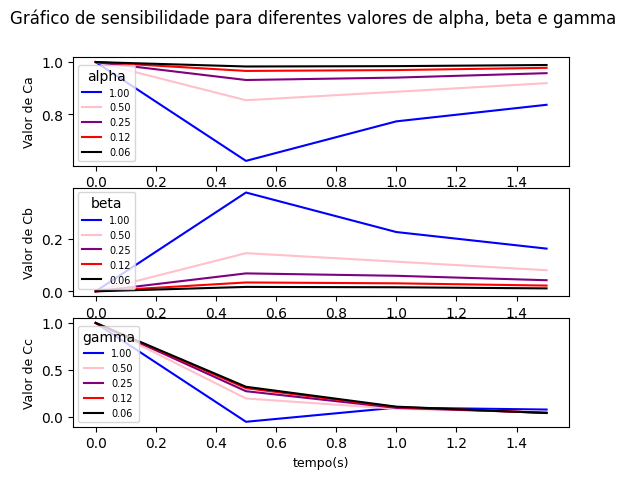

In [115]:
def sensibilidade():
    # sensibilidade_alpha = [alpha-0.1*alpha, alpha-0.05*alpha, alpha, alpha+0.05*alpha, alpha+0.10*alpha]
    # sensibilidade_beta = [beta-0.1*beta, beta-0.05*beta, beta, beta+0.05*beta, beta+0.10*beta]
    # sensibilidade_gamma = [gamma-0.1*gamma, gamma-0.05*gamma, gamma, gamma+0.05*gamma, gamma+0.10*gamma]
    
    sensibilidade_alpha = [alpha]
    sensibilidade_beta = [beta]
    sensibilidade_gamma = [gamma]
    i = 0
    for i in range (0,4):
        sensibilidade_alpha.append(sensibilidade_alpha[i]/2)
        sensibilidade_beta.append(sensibilidade_beta[i]/2)
        sensibilidade_gamma.append(sensibilidade_gamma[i]/2)

    ######## AREA GRAFICO ##########
    fig, (grafico_alpha, grafico_beta, grafico_gamma) = plt.subplots(3, 1)

    for i in range (0,5):
        resultados_RK = rungeKutta(T, deltaT, Ca, Cb, Cc, sensibilidade_alpha[i], sensibilidade_beta[i], sensibilidade_gamma[i])
        cor = ['blue', 'pink', 'purple', 'red', 'black']
        # print("\nResultado {} de RK: {}".format(i, resultados_RK))

        grafico_alpha.plot(resultados_RK[6], resultados_RK[3], color=cor[i], label='%.2f'%(sensibilidade_alpha[i]))
        grafico_alpha.legend(title="alpha", fontsize=7)
        grafico_alpha.set_xlabel("tempo(s)", fontsize=9)
        grafico_alpha.set_ylabel("Valor de Ca", fontsize=9)

        grafico_beta.plot(resultados_RK[6], resultados_RK[4], color=cor[i], label='%.2f'%(sensibilidade_beta[i]))
        grafico_beta.legend(title="beta", fontsize=7)
        grafico_beta.set_xlabel("tempo(s)", fontsize=9)
        grafico_beta.set_ylabel("Valor de Cb", fontsize=9)


        grafico_gamma.plot(resultados_RK[6], resultados_RK[5], color=cor[i], label='%.2f'%(sensibilidade_gamma[i]))
        grafico_gamma.legend(title="gamma", fontsize=7)
        grafico_gamma.set_xlabel("tempo(s)", fontsize=9)
        grafico_gamma.set_ylabel("Valor de Cc", fontsize=9) 


    plt.suptitle('Gráfico de sensibilidade para diferentes valores de alpha, beta e gamma')
    plt.show()  

sensibilidade()